Sakshi Kulshreshtha: 16BCE1198

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.scatter(X[:,0],X[:,1],c='blue',marker='o',s=50)

In [6]:
plt.grid()

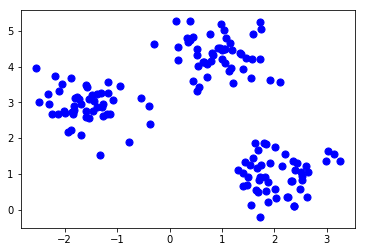

In [7]:
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)

In [10]:
y_km=km.fit_predict(X)

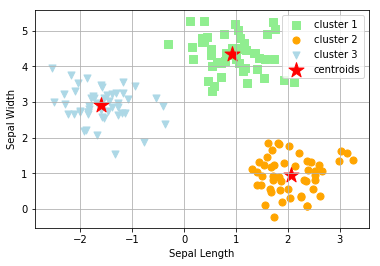

In [11]:
plt.scatter(X[y_km==0,0],X[y_km ==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km ==1,0],X[y_km ==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km ==2,0],X[y_km ==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()

In [12]:
km.inertia_

72.476016709966984

In [13]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

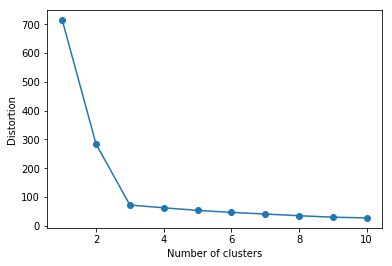

In [13]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Iris Dataset (Using sklearn)

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris=load_iris()
X=iris.data
y=iris.target

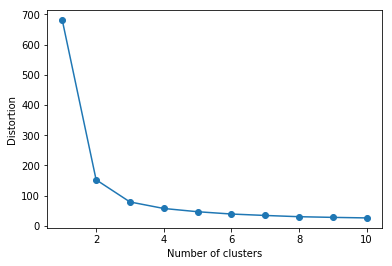

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
#We select 3 as the optimum number of clusters

In [17]:
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)

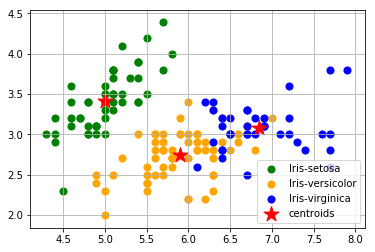

In [18]:
plt.scatter(X[y_km==0,0],X[y_km ==0,1],s=50,c='green',marker='o',label='Iris-setosa')
plt.scatter(X[y_km ==1,0],X[y_km ==1,1],s=50,c='orange',marker='o',label='Iris-versicolor')
plt.scatter(X[y_km ==2,0],X[y_km ==2,1],s=50,c='blue',marker='o',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

OULAD Dataset (Using sklearn)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("E:\SEM 5\MACHINE LEARNING\LAB\Dataset-OULAD\StudentInfoPreprocessed.csv")

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,0] = labelencoder.fit_transform(df.iloc[:,0])
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1])
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2])
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3])
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5] = labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10])
df.iloc[:,11] = labelencoder.fit_transform(df.iloc[:,11])

In [22]:
X=np.array(df.iloc[:,])

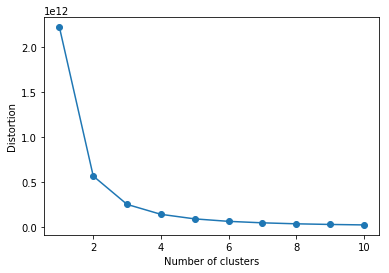

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
#We select 4 as the optimum number of clusters

In [24]:
km=KMeans(n_clusters=4,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)

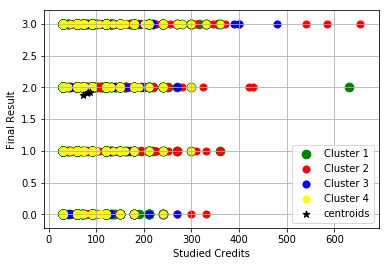

In [25]:
plt.scatter(X[y_km==0,9],X[y_km==0,11],s=75,c='green',marker='o',label='Cluster 1')
plt.scatter(X[y_km==1,9],X[y_km==1,11],s=50,c='red',marker='o',label='Cluster 2')
plt.scatter(X[y_km==2,9],X[y_km==2,11],s=50,c='blue',marker='o',label='Cluster 3')
plt.scatter(X[y_km==3,9],X[y_km==3,11],s=50,c='yellow',marker='o',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,9],km.cluster_centers_[:,11],s=50,marker='*',c='black',label='centroids')
plt.xlabel('Studied Credits')
plt.ylabel('Final Result')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Iris Dataset (Without using KMeans package)

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris=load_iris()
X=iris.data[:,[0,1]]
y=iris.target

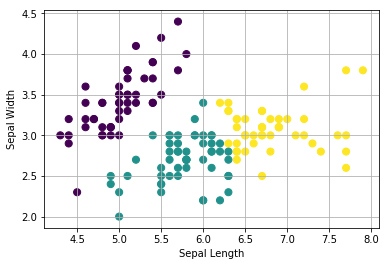

In [28]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X,3)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()
plt.show()

OULAD Dataset (Without using KMeans package)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("E:\SEM 5\MACHINE LEARNING\LAB\Dataset-OULAD\StudentInfoPreprocessed.csv")

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,0] = labelencoder.fit_transform(df.iloc[:,0])
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1])
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2])
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3])
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5] = labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10])
df.iloc[:,11] = labelencoder.fit_transform(df.iloc[:,11])

In [32]:
X=np.array(df.iloc[:,])

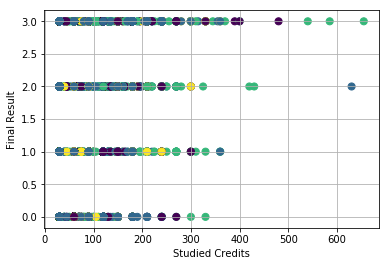

In [33]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X,4)
plt.scatter(X[:,9], X[:,11], c=labels, s=50, cmap='viridis')
plt.xlabel('Studied Credits')
plt.ylabel('Final Result')
plt.grid()
plt.show()